<a href="https://colab.research.google.com/github/TanisiCurtin/Programming-Assignment-2/blob/main/Business_Report_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Programming Assignment 2
Australian Energy Dataset Analysis
Business Reports

So this is a Business Report Notebook which includes code,analysis and discussion

Lets Setup an Environment:
A New colab notebook alog with new repository at my GitHub Account is created.

Lets connect it to Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Following libraries are imported:

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Connecting to the SQLite Database

So we've access the database and connected to SQLlite and will examine the schema of the database and understand the structure of the table

In [5]:
db_path='/content/drive/My Drive/AUS_energy_sqlite3.db'
conn = sqlite3.connect(db_path)
#Verifying connection and checking the database schema
cursor=conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('AUS_energy',)]


There is only One Table names AUS_energy

Data Extraction and Manipulation
Example SQL query to load data into a DataFrame

In [6]:
##lets display the Table AUS_energy
table_name='AUS_energy'
query= f"SELECT * FROM {table_name}"
with pd.option_context('display.max_rows',None): ##to display all rows
    df=pd.read_sql_query(query,conn)
print(df)

       Year State Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)  Population  \
0   2008-09    WA     132.9     294.3     474.7             15.6     2240250   
1   2008-09   NSW     800.9     587.5     131.6             54.7     7408540   
2   2008-09   VIC     695.3     432.9     273.5             33.6     5371934   
3   2008-09   QLD     629.2     469.5     187.9             77.4     4328771   
4   2008-09    SA      80.2     120.2     134.0             21.2     1608902   
..      ...   ...       ...       ...       ...              ...         ...   
93  2021-22   VIC     410.7     410.0     237.5            105.2     6625964   
94  2021-22   QLD     485.6     504.7     305.7            143.0     5320496   
95  2021-22    SA      25.9     141.6      80.2             48.3     1821200   
96  2021-22   TAS       8.8      39.9       7.1             48.1      571013   
97  2021-22    NT                37.6     110.6              1.6      250219   

    GSP ($ million)  
0            2446

So there is one Table called AUS_energy with 8 columns Year	State	Coal (PJ)	Oil (PJ)	Gas (PJ)	Renewables (PJ)	Population	GSP ($ million) and over 97 rows with data.

 **Group A:**
1. **Compute and visualize the total energy consumption for each state**

  State  total_energy_consumption
0   NSW                   22045.8
1    NT                    1331.4
2   QLD                   19096.0
3    SA                    4978.4
4   TAS                    1432.2
5   VIC                   20094.2
6    WA                   12845.0


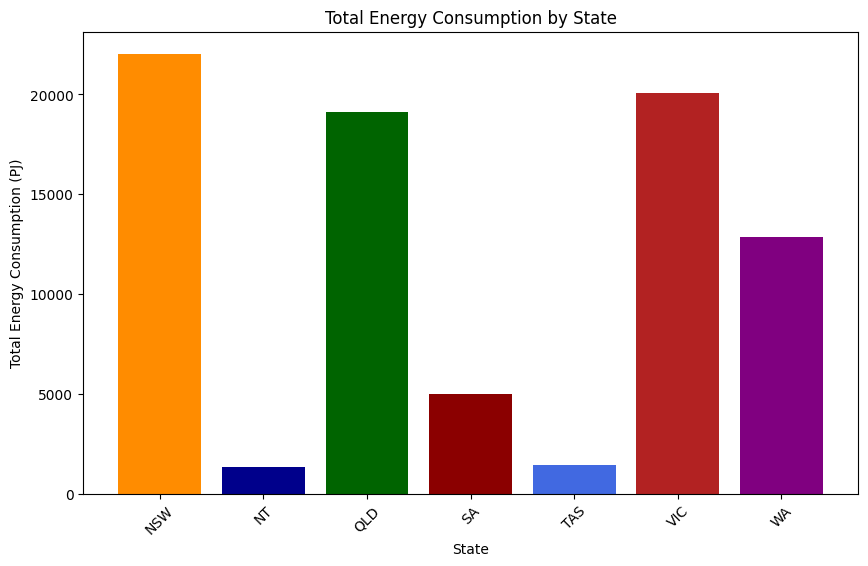

In [18]:
# Sample Data Definition
data = {
    'Year': ['2008-09']*7 + ['2009-10']*7 + ['2010-11']*7 + ['2011-12']*7 + ['2012-13']*7 + ['2013-14']*7 + ['2014-15']*7 + ['2015-16']*7 + ['2016-17']*7 + ['2017-18']*7 + ['2018-19']*7 + ['2019-20']*7 + ['2020-21']*7 + ['2021-22']*7,
    'State': ['WA', 'NSW', 'VIC', 'QLD', 'SA', 'TAS', 'NT']*14,
    'Coal (PJ)': [132.9, 800.9, 695.3, 629.2, 80.2, 12.4, None]*14,
    'Oil (PJ)': [294.3, 587.5, 432.9, 469.5, 120.2, 41.6, 54.8]*14,
    'Gas (PJ)': [474.7, 131.6, 273.5, 187.9, 134, 11.2, 39.9]*14,
    'Renewables (PJ)': [15.6, 54.7, 33.6, 77.4, 21.2, 37.1, 0.4]*14
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert the energy columns to numeric, forcing any errors to NaN
energy_columns = ['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']
df[energy_columns] = df[energy_columns].apply(pd.to_numeric, errors='coerce')

# Calculate total energy consumption
df['total_energy_consumption'] = df[energy_columns].sum(axis=1)

# Group by state and sum the total energy consumption
total_consumption_by_state = df.groupby('State')['total_energy_consumption'].sum().reset_index()

# Print the table
print(total_consumption_by_state)

# Plot the total energy consumption by state
plt.figure(figsize=(10, 6))
plt.bar(total_consumption_by_state['State'], total_consumption_by_state['total_energy_consumption'], color=['darkorange', 'darkblue', 'darkgreen', 'darkred','royalblue','firebrick','purple'])
plt.title('Total Energy Consumption by State')
plt.ylabel('Total Energy Consumption (PJ)')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()

2. **Compute and visualize the total energy consumption by fuel type**

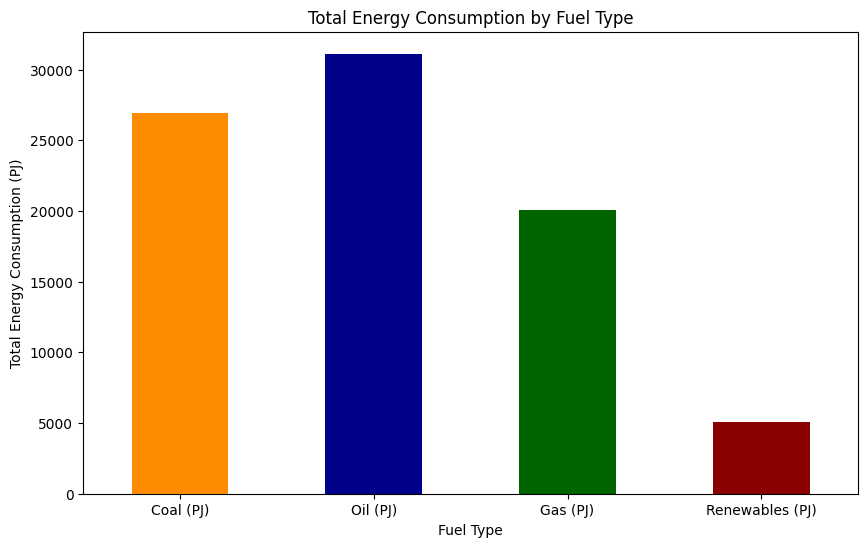

In [20]:
# Query data from the database
query = "SELECT * FROM AUS_energy"
df = pd.read_sql_query(query, conn)

# Convert the energy columns to numeric, forcing any errors to NaN
energy_columns = ['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']
df[energy_columns] = df[energy_columns].apply(pd.to_numeric, errors='coerce')

# Calculate total energy consumption by fuel type
total_consumption_by_fuel = df[energy_columns].sum()

# Plot the total energy consumption by fuel type
plt.figure(figsize=(10, 6))
total_consumption_by_fuel.plot(kind='bar', color=['darkorange', 'darkblue', 'darkgreen', 'darkred'])
plt.title('Total Energy Consumption by Fuel Type')
plt.ylabel('Total Energy Consumption (PJ)')
plt.xlabel('Fuel Type')
plt.xticks(rotation=0)
plt.show()

3. **Analyse and plot the total energy consumption fuel types for each year.**

<Figure size 1000x600 with 0 Axes>

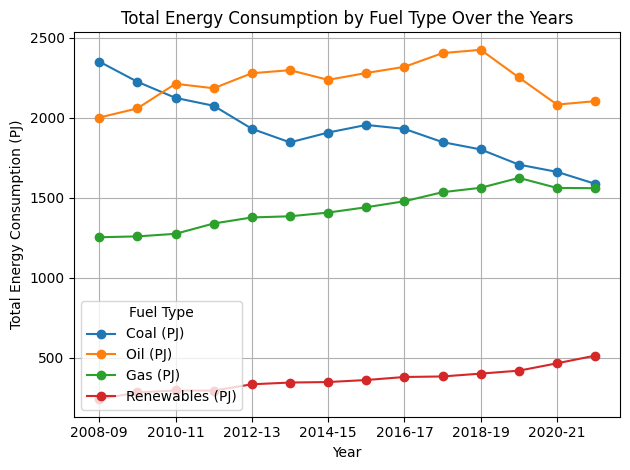

In [30]:
# Convert the energy columns to numeric, forcing any errors to NaN
energy_columns = ['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']
df[energy_columns] = df[energy_columns].apply(pd.to_numeric, errors='coerce')

# Group by year and sum the energy consumption for each fuel type
total_energy_by_yr = df.groupby('Year')[energy_columns].sum()

# Plot the total energy consumption for each fuel type over the years
plt.figure(figsize=(10, 6))
total_energy_by_yr.plot(kind='line', marker='o')
plt.title('Total Energy Consumption by Fuel Type Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption (PJ)')
plt.grid(True)
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

4. **Analyse and visualize the total energy consumption for each state for each year**

In [ ]:
# Convert the energy columns to numeric, forcing any errors to NaN
energy_columns = ['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']
df[energy_columns] = df[energy_columns].apply(pd.to_numeric, errors='coerce')

# Calculate total energy consumption for each row
df['Total Energy Consumption(PJ)']=df[energy_columns].sum(axis=1)

#Group by year, state and then sum the total energy consumption
total_energy_by_state_yr = df.groupby(['Year', 'State'])['Total Energy Consumption(PJ)'].sum().unstack()

#Plot the total energy consumption group by state and years
plt.figure(figsize=(15, 5))
total_energy_by_state_yr.plot(kind='line', marker='o')
plt.title('Total Energy Consumption by State and Year')
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption (PJ)')
plt.grid(True)
plt.legend(title='State')
plt.tight_layout()
plt.show()